### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

### 데이터 일부 확인

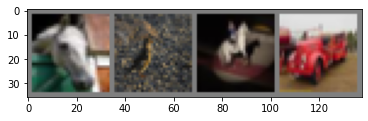

horse bird  horse truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
# 4개 출력 (배치 사이즈)
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
images.size()

torch.Size([4, 3, 32, 32])

In [6]:
labels.size()

torch.Size([4])

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [7]:
import torch.nn as nn

In [8]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개 
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5),             # [batch_size,3,32,32] -> [batch_size,16,28,28]
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),            # [batch_size,16,28,28] -> [batch_size,32,24,24]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,32,24,24] -> [batch_size,32,12,12]
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2), # [batch_size,32,12,12] -> [batch_size,32,12,12] -> padding*2 주의!
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3),            # [batch_size,32,12,12] -> [batch_size,16,10,10]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                                 # [batch_size,16,10,10] -> [batch_size,16,5,5]
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(16*5*5,100),                                                # [batch_size,16*5*5] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
       ##### 아래 작성 #####
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # flatten
        out = self.fc_layer(out)
        return out

net = Net()

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001, momentum=0.9)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [10]:
from torchsummary import summary
summary(net, (3,32,32), batch_size=batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [4, 16, 28, 28]           1,216
              ReLU-2            [4, 16, 28, 28]               0
            Conv2d-3            [4, 32, 24, 24]          12,832
              ReLU-4            [4, 32, 24, 24]               0
         MaxPool2d-5            [4, 32, 12, 12]               0
            Conv2d-6            [4, 32, 12, 12]          25,632
              ReLU-7            [4, 32, 12, 12]               0
            Conv2d-8            [4, 16, 10, 10]           4,624
              ReLU-9            [4, 16, 10, 10]               0
        MaxPool2d-10              [4, 16, 5, 5]               0
           Linear-11                   [4, 100]          40,100
             ReLU-12                   [4, 100]               0
           Linear-13                    [4, 10]           1,010
Total params: 85,414
Trainable params: 

## Train

In [11]:
# 모델을 학습

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        ##### 아래 작성 #####
        optimizer.zero_grad()
        output = net.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.255
[1,  4000] loss: 1.918
[1,  6000] loss: 1.703
[1,  8000] loss: 1.609
[1, 10000] loss: 1.505
[1, 12000] loss: 1.465
[2,  2000] loss: 1.366
[2,  4000] loss: 1.323
[2,  6000] loss: 1.253
[2,  8000] loss: 1.225
[2, 10000] loss: 1.202
[2, 12000] loss: 1.154
Finished Training


## Test

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [13]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


## 클래스별 accuracy 비교

In [14]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.4 %
Accuracy for class: car   is 74.4 %
Accuracy for class: bird  is 52.5 %
Accuracy for class: cat   is 32.8 %
Accuracy for class: deer  is 40.5 %
Accuracy for class: dog   is 45.5 %
Accuracy for class: frog  is 71.1 %
Accuracy for class: horse is 73.1 %
Accuracy for class: ship  is 83.4 %
Accuracy for class: truck is 79.4 %


In [15]:
correct_pred

{'bird': 525,
 'car': 744,
 'cat': 328,
 'deer': 405,
 'dog': 455,
 'frog': 711,
 'horse': 731,
 'plane': 614,
 'ship': 834,
 'truck': 794}